In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
%matplotlib inline

# 1.importing Dataset

In [2]:
columns = ['Sepal length','Sepal width','petal length','petal width','class_labels']
#load the data
df = pd.read_csv(r'C:\Users\vardh\Downloads\archive (1).zip', names = columns)

In [3]:
df.head()

,Sepal length,Sepal width,petal length,petal width,class_labels
0,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


In [4]:
df.describe()

,Sepal length,Sepal width,petal length,petal width,class_labels
count,151,151,151,151,151
unique,36,24,44,23,4
top,5,3,1.5,0.2,Iris-setosa
freq,10,26,14,28,50


In [5]:
df.head(10)

,Sepal length,Sepal width,petal length,petal width,class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
df.shape

(151, 5)

In [6]:
df.tail()

,Sepal length,Sepal width,petal length,petal width,class_labels
146,6.7,3,5.2,2.3,Iris-virginica
147,6.3,2.5,5,1.9,Iris-virginica
148,6.5,3,5.2,2,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3,5.1,1.8,Iris-virginica


In [7]:
df.isnull().sum()

Sepal length    0
Sepal width     0
petal length    0
petal width     0
class_labels    0
dtype: int64

In [8]:
df.dtypes

Sepal length    object
Sepal width     object
petal length    object
petal width     object
class_labels    object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sepal length  151 non-null    object
 1   Sepal width   151 non-null    object
 2   petal length  151 non-null    object
 3   petal width   151 non-null    object
 4   class_labels  151 non-null    object
dtypes: object(5)
memory usage: 6.0+ KB


In [10]:
data = df.groupby('class_labels')

In [12]:
data.head()

,Sepal length,Sepal width,petal length,petal width,class_labels
0,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5,3.6,1.4,0.2,Iris-setosa
51,7,3.2,4.7,1.4,Iris-versicolor
52,6.4,3.2,4.5,1.5,Iris-versicolor
53,6.9,3.1,4.9,1.5,Iris-versicolor
54,5.5,2.3,4,1.3,Iris-versicolor


In [13]:
df['class_labels'].unique()

array(['species', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sepal length  151 non-null    object
 1   Sepal width   151 non-null    object
 2   petal length  151 non-null    object
 3   petal width   151 non-null    object
 4   class_labels  151 non-null    object
dtypes: object(5)
memory usage: 6.0+ KB


# 2.Visualizing the dataset

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['class_labels_encoded'] = label_encoder.fit_transform(df['class_labels'])



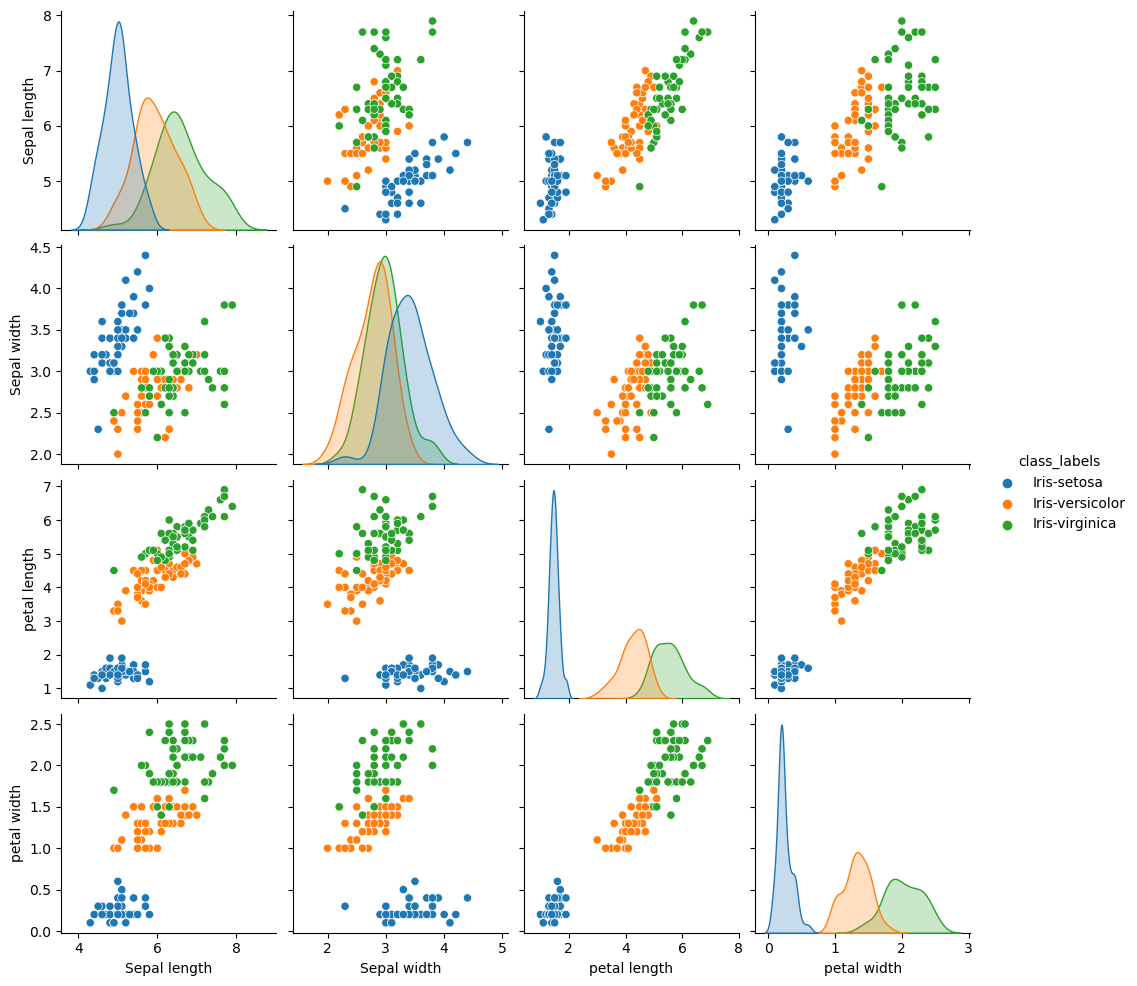

In [15]:
sns.pairplot(df, hue ='class_labels')

<Axes: >

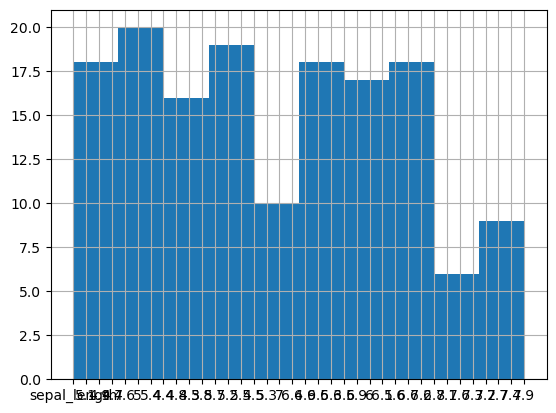

In [16]:
df['Sepal length'].hist()

C:\Users\kavya\AppData\Local\Temp\ipykernel_9932\3215303765.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="plasma")


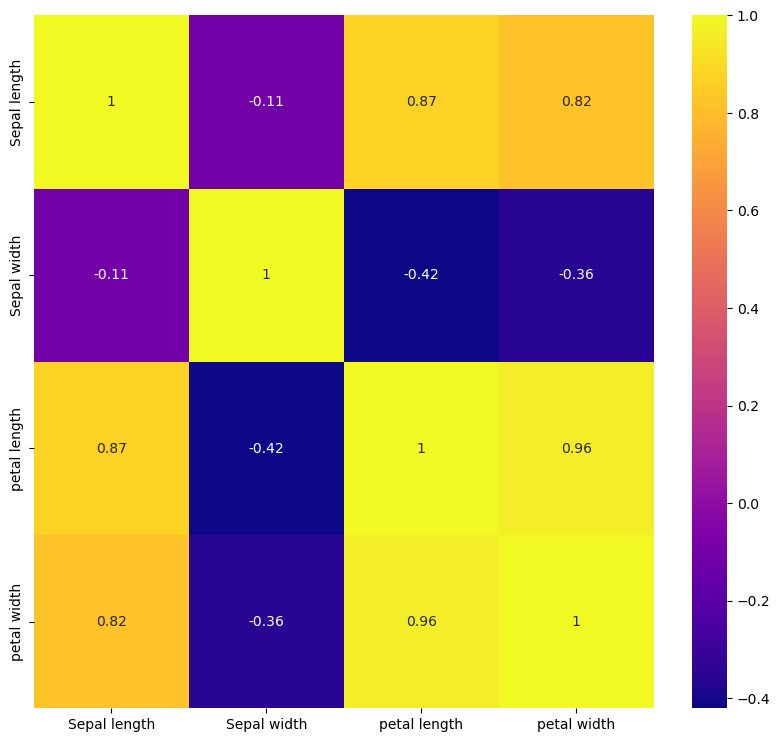

In [17]:
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(),annot=True,cmap="plasma")
plt.show()

# seperating input columns and the output column

In [17]:
#seperate features and target
data = df.values
X = data[:,0:4]
Y = data[:,4]
print(X)

[['sepal_length' 'sepal_width' 'petal_length' 'petal_width']
 ['5.1' '3.5' '1.4' '0.2']
 ['4.9' '3' '1.4' '0.2']
 ['4.7' '3.2' '1.3' '0.2']
 ['4.6' '3.1' '1.5' '0.2']
 ['5' '3.6' '1.4' '0.2']
 ['5.4' '3.9' '1.7' '0.4']
 ['4.6' '3.4' '1.4' '0.3']
 ['5' '3.4' '1.5' '0.2']
 ['4.4' '2.9' '1.4' '0.2']
 ['4.9' '3.1' '1.5' '0.1']
 ['5.4' '3.7' '1.5' '0.2']
 ['4.8' '3.4' '1.6' '0.2']
 ['4.8' '3' '1.4' '0.1']
 ['4.3' '3' '1.1' '0.1']
 ['5.8' '4' '1.2' '0.2']
 ['5.7' '4.4' '1.5' '0.4']
 ['5.4' '3.9' '1.3' '0.4']
 ['5.1' '3.5' '1.4' '0.3']
 ['5.7' '3.8' '1.7' '0.3']
 ['5.1' '3.8' '1.5' '0.3']
 ['5.4' '3.4' '1.7' '0.2']
 ['5.1' '3.7' '1.5' '0.4']
 ['4.6' '3.6' '1' '0.2']
 ['5.1' '3.3' '1.7' '0.5']
 ['4.8' '3.4' '1.9' '0.2']
 ['5' '3' '1.6' '0.2']
 ['5' '3.4' '1.6' '0.4']
 ['5.2' '3.5' '1.5' '0.2']
 ['5.2' '3.4' '1.4' '0.2']
 ['4.7' '3.2' '1.6' '0.2']
 ['4.8' '3.1' '1.6' '0.2']
 ['5.4' '3.4' '1.5' '0.4']
 ['5.2' '4.1' '1.5' '0.1']
 ['5.5' '4.2' '1.4' '0.2']
 ['4.9' '3.1' '1.5' '0.1']
 ['5' '3.2' '1

In [18]:
data = df.values
X = data[:,0:4]
Y = data[:,4]
print(Y)

['species' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris

In [20]:
# Calculate average of each features for all classes
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

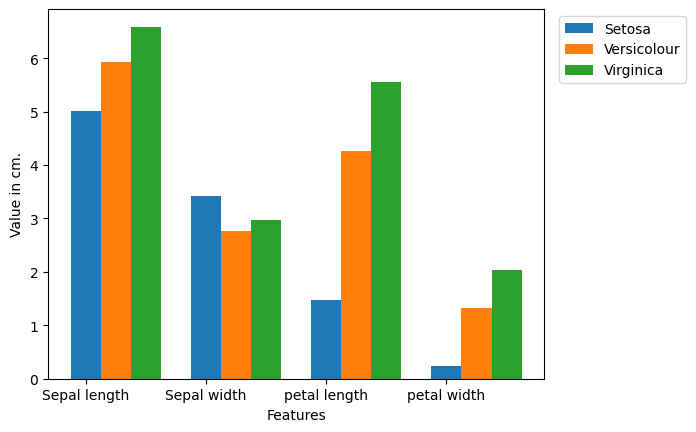

In [21]:
# Plot the average
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

# 3.model training

In [22]:
#split the data to train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_test, Y_train = train_test_split(X, Y,test_size = 0.2)
X_train

array([['7', '3.2', '4.7', '1.4'],
       ['6.7', '3.3', '5.7', '2.5'],
       ['4.8', '3.4', '1.6', '0.2'],
       ['5.5', '2.3', '4', '1.3'],
       ['6.3', '3.3', '6', '2.5'],
       ['7.7', '3.8', '6.7', '2.2'],
       ['6.1', '2.9', '4.7', '1.4'],
       ['5.4', '3.4', '1.5', '0.4'],
       ['7.9', '3.8', '6.4', '2'],
       ['5.4', '3.4', '1.7', '0.2'],
       ['6.8', '2.8', '4.8', '1.4'],
       ['5.1', '3.5', '1.4', '0.3'],
       ['5.5', '4.2', '1.4', '0.2'],
       ['4.7', '3.2', '1.6', '0.2'],
       ['6.6', '3', '4.4', '1.4'],
       ['6.3', '3.4', '5.6', '2.4'],
       ['5.2', '3.5', '1.5', '0.2'],
       ['5.2', '3.4', '1.4', '0.2'],
       ['6.1', '2.8', '4.7', '1.2'],
       ['4.9', '3', '1.4', '0.2'],
       ['6.9', '3.2', '5.7', '2.3'],
       ['5.6', '2.9', '3.6', '1.3'],
       ['6.3', '3.3', '4.7', '1.6'],
       ['6.7', '3.3', '5.7', '2.1'],
       ['5', '2', '3.5', '1'],
       ['5.1', '3.8', '1.5', '0.3'],
       ['6.4', '3.2', '5.3', '2.3'],
       ['6.9', '3.1

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_test, Y_train = train_test_split(X, Y,test_size = 0.2)
Y_train

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [26]:
X_train.shape

(105, 4)

In [27]:
Y_train.shape

(105,)

In [28]:
K = 6
Knclr = KNeighborsClassifier(K)

In [43]:
Knclr.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=6)

In [44]:
Y_pred = Knclr.predict(X_test)

In [45]:
metrics.accuracy_score(Y_test, Y_pred)*100

100.0